# 딥러닝 구조 연습4-이미지

* 흑백 손글씨 숫자 이미지(28x28 픽셀)를 10개의 범주(0에서 9까지)로 분류하는 것입니다. 

## 라이브러리 로드

In [72]:
import numpy as np
from keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.model_selection import train_test_split

## 데이터 로드

In [73]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [74]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [51]:
test_images.shape,test_labels.shape

((10000, 28, 28), (10000,))

In [52]:
train_images.ndim

3

In [53]:
train_labels # 정수 라벨 인코딩이 진행된 상태

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [54]:
np.unique(train_labels,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [55]:
np.unique(test_labels,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

## 데이터 준비

In [75]:
#데이터 전처리까지 진행
train_scaled = train_images/255.0

In [76]:
train_scaled.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [77]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [78]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [79]:
train_labels # 원핫인코딩

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [80]:
test_images.shape

(10000, 28, 28)

In [81]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 딥러닝 구성하기

In [138]:
#훈련데이터 (전처리 완료상태), 라벨(원핫인코딩이 적용된 형태)
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(50, activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu' , input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu' , input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax' , input_shape=(784,)))

## 딥러닝 설정하기

In [139]:
#손실함수
#옵티마이저:경사하강법 종류
#평가방법
#원핫인코딩이기 때문에 sparse를쓰면안됌
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')


## 모델 최적화 설정

* 콜백: 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
* ModelCheckpoint(): 최상의 검증 점수를 만드는 그 때 당시의 가중치와 모델 구조를 저장
* EarlyStopping():검증 점수가 제일 낮을 때, 학습을 중단하여 과적합이 시작되기 전에 훈련을 미리 중지(자원 절약)




In [ ]:
# ## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# ## 코랩을 사용할 때
# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

In [140]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

modelpath="./model/MNIST손글씨_dnn_model.hdf5"

#베스트모델 저장
#save_best_only=True : 검증점수의 성능이 향상 되었을 때만 저장


#검증점수를 모니터링하여 더 이상 성능이 향상되지 않으면 조기종료
#5번 연속 검증점수가 향상되지 않으면 훈련 중지



## 딥러닝 훈련하기

In [85]:
train_labels.shape,train_scaled.shape,test_labels.shape,test_images.shape

((60000, 10), (60000, 28, 28), (10000, 10), (10000, 28, 28))

In [141]:
# 128개 샘플씩 미니 배치로 훈련 데이터 다섯 번 반복
from tabnanny import verbose


checkpoint_cb = ModelCheckpoint(modelpath,save_best_only=True)

#2번 연속 검증점수가 향상되지 않으면 훈련 중지
early_stopping_cb = EarlyStopping(patience=2,restore_best_weights=True) # 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림.


history = model.fit(train_scaled, train_labels, epochs=30,batch_size=128,
                        validation_data=(test_images, test_labels),
                        callbacks=[checkpoint_cb, early_stopping_cb]) 




Epoch 1/30
469/469 [==============================] - 3s 4ms/step - loss: 0.6973 - accuracy: 0.7803 - val_loss: 32.1466 - val_accuracy: 0.9323
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.3195 - accuracy: 0.9092 - val_loss: 26.1328 - val_accuracy: 0.9470
Epoch 3/30
469/469 [==============================] - 2s 3ms/step - loss: 0.2578 - accuracy: 0.9260 - val_loss: 25.0327 - val_accuracy: 0.9534
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2219 - accuracy: 0.9369 - val_loss: 19.9599 - val_accuracy: 0.9594
Epoch 5/30
469/469 [==============================] - 2s 3ms/step - loss: 0.2040 - accuracy: 0.9422 - val_loss: 21.2282 - val_accuracy: 0.9611
Epoch 6/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1876 - accuracy: 0.9461 - val_loss: 17.8621 - val_accuracy: 0.9646
Epoch 7/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1750 - accuracy: 0.9501 - val_loss: 22.0575 - val_accuracy: 0.9607

In [149]:
 # 몇 번째 에포크에서 훈련이 중지 되었는지..
early_stopping_cb.stopped_epoch

7

## 평가하기

In [154]:
test_scaled = test_images/255.0


In [155]:
model.evaluate(test_scaled,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1241 - accuracy: 0.9630


[0.12411688268184662, 0.9629999995231628]

테스트 세트의 정확도는 98.2%로 나왔습니다. 훈련 세트 정확도보다는 약간 낮습니다. 
약간의 과대적합이 보입니다. 

## 시각화하기

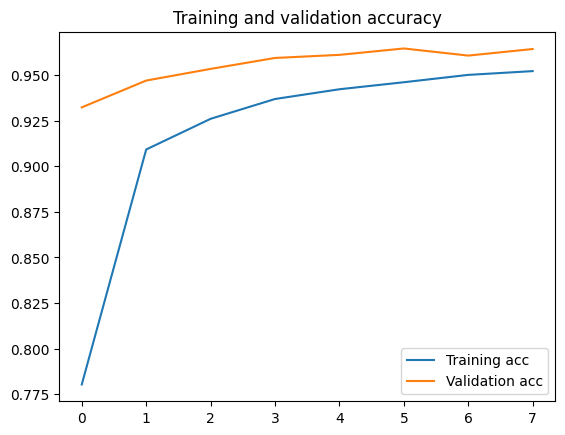

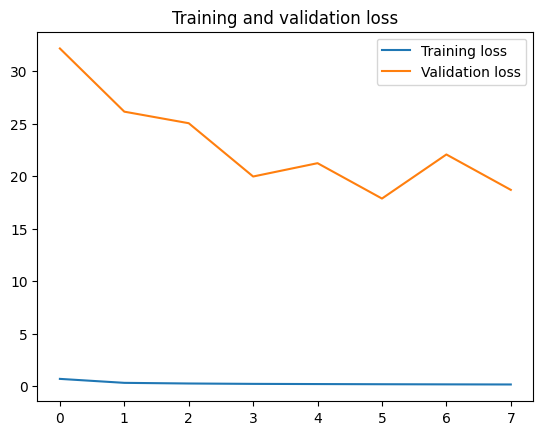

In [164]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 전체 코드

In [ ]:
# ## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

## 평가

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

---

## 진짜 내 손글씨 판단하기

* 28x28 픽셀 그림판 만들기 (가로 세로 비율 유지 체크 해제)
* 브러시로 숫자 쓰기
* 저장하기(png형태)

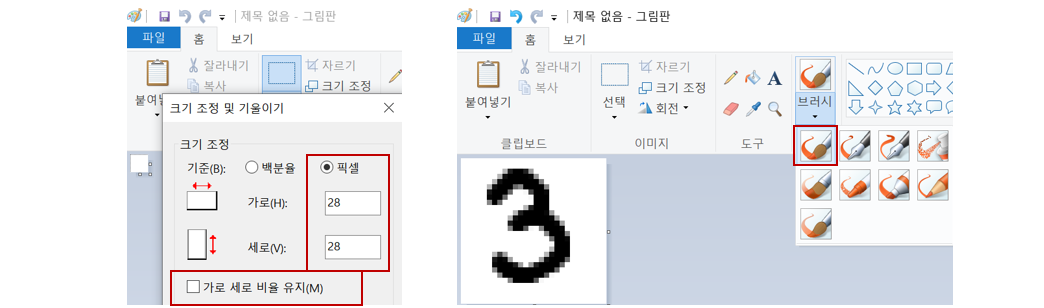

In [153]:
from PIL import Image
Image.open("./image/3.png",)

FileNotFoundError: [Errno 2] No such file or directory: './image/3.png'

In [ ]:
## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

In [ ]:
from keras.models import load_model
from keras.utils import np_utils
import matplotlib.pyplot as plt

# 필요 라이브러리 호출(PIL은 이미지파일 처리위함)
from PIL import Image
import numpy as np

# .png 파일 열어서 L(256단계 흑백이미지)로 변환
img = Image.open("./image/3.png").convert('L')
plt.imshow(img)
plt.show()

# # # 이미지를 784개 흑백 픽셀로 사이즈 변환
img = np.resize(img, (1, 784))

# # # 데이터를 모델에 적용할 수 있도록 가공
test_data = ((img / 255.0) - 1) * -1


In [ ]:
test_data

In [ ]:
# 모델을 다시 읽어서 예측을 해보자

from tensorflow.keras.models import load_model
model = load_model('./model/MNIST손글씨_dnn_model.hdf5') 

result = model.predict(test_data)